In [18]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y
import seaborn as sns

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')


Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    certifi-2019.3.9           |           py36_0         149 KB  conda-forge
    conda-4.6.8                |           py36_0         876 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.19.0               |             py_0          53 KB  conda-forge
    openssl-1.1.1b             |       h14c3975_1         4.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.49-py_0

The follow

In [125]:
# Data from website - https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2
import pandas as pd
import csv
import urllib.request
import io


url="https://raw.githubusercontent.com/acovasa/Data/master/DOHMH.csv"

#url='https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2/data'


# Read the CSV data file from the object storage into a pandas DataFrame


FM_NYC=requests.get(url).content
FM_NYC



b'FacilityName,Service Category,Service Type,Address,Address 2,Borough,ZipCode,Latitude,Longitude,AdditionalInfo,StartDate,EndDate,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Accepts EBT,NYC Dept of Health Cooking Demonstrations,Open Year-Round,Website,Location Point\nInwood Park Greenmarket,Farmers Markets and Food Boxes ,Farmers Markets,Isham St bet Seaman & Cooper,,Manhattan,10034,40.8690087167,-73.9203204394,Open year-round,,,,,,,,8am-3pm,,true,false,true,https://www.grownyc.org/greenmarket,"(40.8690087167, -73.9203204394)"\n82nd Street Greenmarket,Farmers Markets and Food Boxes ,Farmers Markets,82nd St bet 1st & York Aves ,,Manhattan,10028,40.7734483572999,-73.9489535725,Open year-round,,,,,,,,9am-2:30pm ,,true,false,true,https://www.grownyc.org/greenmarket,"(40.7734483572999, -73.9489535725)"\n1 Centre Street,Farmers Markets and Food Boxes ,Food Boxes,1 Centre Street,"South Building, 9th Floor",Manhattan,11101,40.7130276,-74.0037529,Open year-round,,,,,,2:00 pm - 6:0

In [150]:
from urllib.request import urlopen
import csv    
import pandas as pd
import io
import requests

url = "https://raw.githubusercontent.com/acovasa/Data/master/DOHMH.csv"
s = requests.get(url).content
FM_NYC = pd.read_csv(io.StringIO(s.decode('utf-8')))
FM_NYC


,FacilityName,Service Category,Service Type,Address,Address 2,Borough,ZipCode,Latitude,Longitude,AdditionalInfo,StartDate,EndDate,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Accepts EBT,NYC Dept of Health Cooking Demonstrations,Open Year-Round,Website,Location Point
0,Inwood Park Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,Isham St bet Seaman & Cooper,NaN,Manhattan,10034,40.869009,-73.920320,Open year-round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8am-3pm,NaN,True,False,True,https://www.grownyc.org/greenmarket,"(40.8690087167, -73.9203204394)"
1,82nd Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,82nd St bet 1st & York Aves,NaN,Manhattan,10028,40.773448,-73.948954,Open year-round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9am-2:30pm,NaN,True,False,True,https://www.grownyc.org/greenmarket,"(40.7734483572999, -73.9489535725)"
2,1 Centre Street,Farmers Markets and Food Boxes,Food Boxes,1 Centre Street,"South Building, 9th Floor",Manhattan,11101,40.713028,-74.003753,Open year-round,NaN,NaN,NaN,NaN,NaN,2:00 pm - 6:00 pm,NaN,NaN,NaN,True,False,True,https://www.grownyc.org/greenmarketco/foodbox,"(40.7130276, -74.0037529)"
3,125th Street Farmers Market,Farmers Markets and Food Boxes,Farmers Markets,125th St & Adam Clayton Powell Jr Blvd,NaN,Manhattan,10027,40.808981,-73.948327,Market open dates: 6/13/2017 to 11/21/2017,06/13/2017,11/21/2017,NaN,10am-7pm,NaN,NaN,NaN,NaN,NaN,True,False,False,https://www.grownyc.org/greenmarket,"(40.8089813746999, -73.9483266703999)"
4,170 Farm Stand,Farmers Markets and Food Boxes,Farmers Markets,170th St & Townsend Ave,NaN,Bronx,10452,40.840095,-73.916827,Market open dates: 7/5/2017 to 11/22/2017,07/05/2017,11/22/2017,NaN,NaN,2:30pm-6:30pm,NaN,NaN,NaN,NaN,True,False,False,NaN,"(40.840095, -73.916827)"
5,175th Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,175th St bet Wadsworth Ave & Broadway,NaN,Manhattan,10033,40.845956,-73.937813,Market open dates: 6/29/2017 to 11/30/2017,06/29/2017,11/30/2017,NaN,NaN,NaN,8am-5pm,NaN,NaN,NaN,True,True,False,https://www.grownyc.org/greenmarket,"(40.8459557405, -73.9378126725)"
6,57th Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,57th St & 9th Ave,NaN,Manhattan,10019,40.767925,-73.985716,Market open dates: 5/17/2017 to 12/23/2017,05/17/2017,12/23/2017,NaN,NaN,8am-5pm,NaN,NaN,8am-5pm,NaN,True,False,False,https://www.grownyc.org/greenmarket,"(40.7679253828, -73.9857161617999)"
7,79th Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,Columbus Ave bet 78th & 81st Sts,NaN,Manhattan,10024,40.783250,-73.974541,Open year-round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9am-5pm,True,False,True,https://www.grownyc.org/greenmarket,"(40.7832500724, -73.9745405583999)"
8,92nd Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,92nd St & 1st Ave,NaN,Manhattan,10128,40.781324,-73.946131,Market open dates: 6/25/2017 to 11/19/2017,06/25/2017,11/19/2017,NaN,NaN,NaN,NaN,NaN,NaN,9am-4pm,True,False,False,https://www.grownyc.org/greenmarket,"(40.7813244698999, -73.9461310652)"
9,97th Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,97th St bet Columbus & Amsterdam Aves,NaN,Manhattan,10025,40.794744,-73.969874,Open year-round,NaN,NaN,NaN,NaN,NaN,NaN,8am-2pm,NaN,NaN,True,True,True,https://www.grownyc.org/greenmarket,"(40.7947438866, -73.9698736061999)"


In [151]:
FM_NYC.rename(columns={'Service Type':'Service_Type'}, inplace=True)
print(FM_NYC.Service_Type.unique())

['Farmers Markets' 'Food Boxes']


In [152]:
FM_NYC['Service_Type'].value_counts().to_frame()

,Service_Type
Farmers Markets,144
Food Boxes,17


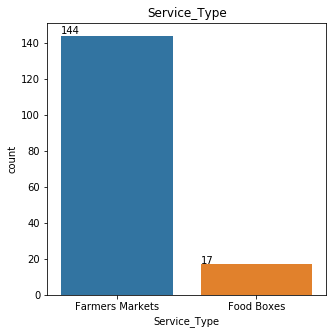

In [153]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Service_Type',data=FM_NYC)
ax.set_title("Service_Type")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    
plt.show();


In [154]:
# FM_NYC_filtered - Dataset with only Farmers Market
FM_NYC_filtered = FM_NYC[FM_NYC['Service_Type'] == 'Farmers Markets'].copy()
FM_NYC_filtered ['Borough'] = FM_NYC_filtered['Borough'].map(lambda x: x.strip())
print(FM_NYC_filtered.shape)
FM_NYC_filtered.head()


(144, 24)


,FacilityName,Service Category,Service_Type,Address,Address 2,Borough,ZipCode,Latitude,Longitude,AdditionalInfo,StartDate,EndDate,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Accepts EBT,NYC Dept of Health Cooking Demonstrations,Open Year-Round,Website,Location Point
0,Inwood Park Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,Isham St bet Seaman & Cooper,NaN,Manhattan,10034,40.869009,-73.920320,Open year-round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8am-3pm,NaN,True,False,True,https://www.grownyc.org/greenmarket,"(40.8690087167, -73.9203204394)"
1,82nd Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,82nd St bet 1st & York Aves,NaN,Manhattan,10028,40.773448,-73.948954,Open year-round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9am-2:30pm,NaN,True,False,True,https://www.grownyc.org/greenmarket,"(40.7734483572999, -73.9489535725)"
3,125th Street Farmers Market,Farmers Markets and Food Boxes,Farmers Markets,125th St & Adam Clayton Powell Jr Blvd,NaN,Manhattan,10027,40.808981,-73.948327,Market open dates: 6/13/2017 to 11/21/2017,06/13/2017,11/21/2017,NaN,10am-7pm,NaN,NaN,NaN,NaN,NaN,True,False,False,https://www.grownyc.org/greenmarket,"(40.8089813746999, -73.9483266703999)"
4,170 Farm Stand,Farmers Markets and Food Boxes,Farmers Markets,170th St & Townsend Ave,NaN,Bronx,10452,40.840095,-73.916827,Market open dates: 7/5/2017 to 11/22/2017,07/05/2017,11/22/2017,NaN,NaN,2:30pm-6:30pm,NaN,NaN,NaN,NaN,True,False,False,NaN,"(40.840095, -73.916827)"
5,175th Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,175th St bet Wadsworth Ave & Broadway,NaN,Manhattan,10033,40.845956,-73.937813,Market open dates: 6/29/2017 to 11/30/2017,06/29/2017,11/30/2017,NaN,NaN,NaN,8am-5pm,NaN,NaN,NaN,True,True,False,https://www.grownyc.org/greenmarket,"(40.8459557405, -73.9378126725)"


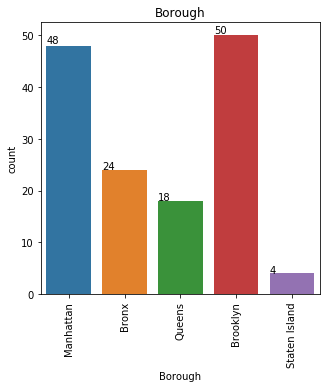

In [155]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Borough',data=FM_NYC_filtered)
ax.set_title("Borough")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()


In [156]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7308619, -73.9871558.


In [157]:
# create map of New York City using latitude and longitude values
map_markets = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, FacilityName, borough in zip(FM_NYC_filtered['Latitude'], FM_NYC_filtered['Longitude'], FM_NYC_filtered['FacilityName'], FM_NYC_filtered['Borough']):
            label = '{}, {}'.format(FacilityName, borough)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='green',
                fill=True,
                fill_color='green',
                fill_opacity=0.7,
                parse_html = False).add_to(map_markets)  

map_markets